# Combining misaligned spectra

*gully* and *Aishwarya*  
November 12, 2021

In [a previous tutorial](https://muler.readthedocs.io/en/latest/tutorials/Combining_uncertainties_with_specutils.html) we saw how to combine spectra that are aligned.  Here we show a new way to combine misaligned spectra.

In [1]:
from muler.hpf import HPFSpectrum
from gollum.phoenix import PHOENIXSpectrum
import astropy.units as u
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

We'll conduct the same steps as we did in [our previous tutorial on masking](https://muler.readthedocs.io/en/latest/tutorials/Masking_and_flattening.html).

In [3]:
import glob

In [4]:
fns = glob.glob('../../../muler_example_data/HPF/01_A0V_standards/Goldilocks_*.spectra.fits')

In [5]:
n_spectra = len(fns)

In [6]:
multi_spectra = []
for fn in fns:
    raw_spectrum = HPFSpectrum(file = fn, order=6)
    multi_spectra.append(raw_spectrum)

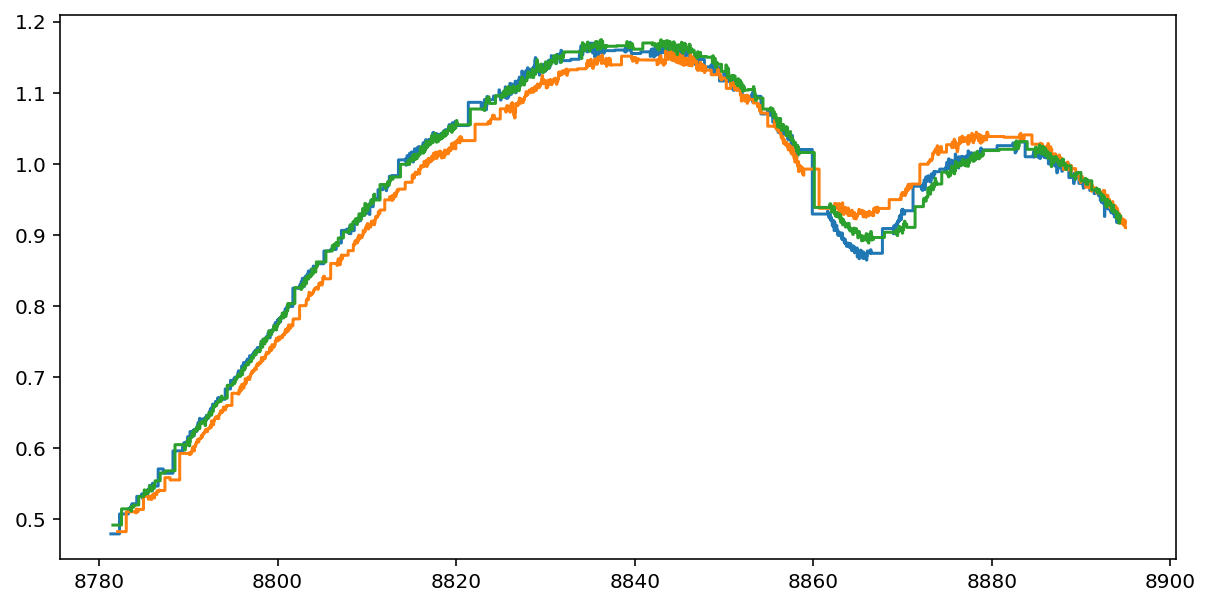

In [7]:
fig, ax = plt.subplots(1, figsize=(10, 5))

for i in range(n_spectra):
    multi_spectra[i]\
        .trim_edges((4, 2042))\
        .normalize()\
        .mask_tellurics()\
        .barycentric_correct()\
        .plot(ax)

Awesome! We have three spectra we want to combine, *but* the spectra are not aligned! What do we do?